In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt  

## Variables:

Gender: (female,male)

Age (years): numeric

Height (meters): numeric

Weight (kg): numeric

family_history_with_overweight: (no,yes)

FAVC (Frequent consumption of high caloric food): (no,yes)

FCVC (Frequency of consumption of vegetables): (Never,Sometimes,Always)

NCP (Number of main meals): (Between 1 & 2,Three,More than three)

CAEC (Consumption of food between meals): (no,Sometimes,Frequently,Always)

SMOKE: (no,yes)

CH2O (Consumption of water daily): (Less than a liter,Between 1 and 2 L,More than 2 L)

SCC (Calories consumption monitoring): (no,yes)

FAF (Physical activity frequency): (I do not have,1 or 2 days,2 or 4 days,4 or 5 days)

TUE (Time using technology devices): (0–2 hours,3–5 hours,More than 5 hours)

CALC (Consumption of alcohol): (no,Sometimes,Frequently,Always)

MTRANS (Transportation used): (Automobile,Motorbike,Bike,Public Transportation,Walking)

NObeyesdad: (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II 
and Obesity Type III) --> (Insufficient,Normal,Overweight,Obese)

In [2]:
obesity_data = pd.read_csv('../data/original_data.csv')
obesity_df = pd.DataFrame(obesity_data)
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
obesity_rounded = obesity_df.round({'Age':0,'Height':1,'Weight':1, 'FCVC':0, 'NCP':0, 'CH2O':0, 'FAF':0, 'TUE':0})
obesity_rounded.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,21.0,1.7,131.4,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22.0,1.7,133.7,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23.0,1.8,133.7,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.0,1.7,133.3,yes,yes,3.0,3.0,Sometimes,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24.0,1.7,133.5,yes,yes,3.0,3.0,Sometimes,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
#remove types from weight type
obesity_rounded['NObeyesdad'] = obesity_rounded['NObeyesdad'].str.split('_').str[0]
obesity_rounded['NObeyesdad'] = obesity_rounded['NObeyesdad'].str.split(' ').str[0]
obesity_rounded['NObeyesdad'].replace(to_replace='Obesity',value='Obese',inplace=True)
obesity_rounded.head(15)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.6,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal
1,Female,21.0,1.5,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal
2,Male,23.0,1.8,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal
3,Male,27.0,1.8,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight
4,Male,22.0,1.8,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight
5,Male,29.0,1.6,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal
6,Female,23.0,1.5,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal
7,Male,22.0,1.6,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal
8,Male,24.0,1.8,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal
9,Male,22.0,1.7,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal


In [5]:
#make categorical data consistent and easy to understand prior to encoding
obesity_rounded['FCVC'].replace({1.0:'Never', 2.0:'Sometimes',3.0:'Always'},inplace=True)
obesity_rounded['NCP'].replace({1.0:'Between 1 & 2', 2.0:'Three',3.0:'More than three'},inplace=True)
obesity_rounded['CH2O'].replace({1.0:'Less than a liter', 2.0:'Between 1 and 2 L',3.0:'More than 2 L'},inplace=True)
obesity_rounded['FAF'].replace({0.0:'I do not have', 1.0:'1 or 2 days', 2.0:'2 or 4 days',3.0:'4 or 5 days'},inplace=True)
obesity_rounded['TUE'].replace({0.0:'0 to 2 hours', 1.0:'3 to 5 hours',2.0:'More than 5 hours'},inplace=True)
obesity_rounded.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.6,64.0,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,I do not have,3 to 5 hours,no,Public_Transportation,Normal
1,Female,21.0,1.5,56.0,yes,no,Always,More than three,Sometimes,yes,More than 2 L,yes,4 or 5 days,0 to 2 hours,Sometimes,Public_Transportation,Normal
2,Male,23.0,1.8,77.0,yes,no,Sometimes,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3 to 5 hours,Frequently,Public_Transportation,Normal
3,Male,27.0,1.8,87.0,no,no,Always,More than three,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0 to 2 hours,Frequently,Walking,Overweight
4,Male,22.0,1.8,89.8,no,no,Sometimes,Between 1 & 2,Sometimes,no,Between 1 and 2 L,no,I do not have,0 to 2 hours,Sometimes,Public_Transportation,Overweight


In [6]:
# obese_dummies = pd.get_dummies(obesity_rounded)
# obese_dummies.head()

In [7]:
# obese_dummies.drop(columns=['Gender_Male','family_history_with_overweight_no',])

In [8]:
# one hot encode the variables where order/weight is not important
# 'Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS'
obese_one_hot = pd.get_dummies(data=obesity_rounded, columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC','MTRANS'])   
obese_one_hot.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.6,64.0,Sometimes,More than three,Sometimes,Between 1 and 2 L,I do not have,3 to 5 hours,no,...,0,1,0,1,0,0,0,0,1,0
1,21.0,1.5,56.0,Always,More than three,Sometimes,More than 2 L,4 or 5 days,0 to 2 hours,Sometimes,...,0,0,1,0,1,0,0,0,1,0
2,23.0,1.8,77.0,Sometimes,More than three,Sometimes,Between 1 and 2 L,2 or 4 days,3 to 5 hours,Frequently,...,0,1,0,1,0,0,0,0,1,0
3,27.0,1.8,87.0,Always,More than three,Sometimes,Between 1 and 2 L,2 or 4 days,0 to 2 hours,Frequently,...,0,1,0,1,0,0,0,0,0,1
4,22.0,1.8,89.8,Sometimes,Between 1 & 2,Sometimes,Between 1 and 2 L,I do not have,0 to 2 hours,Sometimes,...,0,1,0,1,0,0,0,0,1,0


In [9]:
obese_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   object 
 4   NCP                                 2111 non-null   object 
 5   CAEC                                2111 non-null   object 
 6   CH2O                                2111 non-null   object 
 7   FAF                                 2111 non-null   object 
 8   TUE                                 2111 non-null   object 
 9   CALC                                2111 non-null   object 
 10  NObeyesdad                          2111 non-null   object 
 11  Gender_Female                       2111 no

In [10]:
obesity_numeric = obese_one_hot
obesity_numeric.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.6,64.0,Sometimes,More than three,Sometimes,Between 1 and 2 L,I do not have,3 to 5 hours,no,...,0,1,0,1,0,0,0,0,1,0
1,21.0,1.5,56.0,Always,More than three,Sometimes,More than 2 L,4 or 5 days,0 to 2 hours,Sometimes,...,0,0,1,0,1,0,0,0,1,0
2,23.0,1.8,77.0,Sometimes,More than three,Sometimes,Between 1 and 2 L,2 or 4 days,3 to 5 hours,Frequently,...,0,1,0,1,0,0,0,0,1,0
3,27.0,1.8,87.0,Always,More than three,Sometimes,Between 1 and 2 L,2 or 4 days,0 to 2 hours,Frequently,...,0,1,0,1,0,0,0,0,0,1
4,22.0,1.8,89.8,Sometimes,Between 1 & 2,Sometimes,Between 1 and 2 L,I do not have,0 to 2 hours,Sometimes,...,0,1,0,1,0,0,0,0,1,0


In [11]:
# this is manually doing label encoding
# obesity_numeric['Gender'].replace({'Female':0,'Male':1},inplace=True)
# obesity_numeric['family_history_with_overweight'].replace({'no':0,'yes':1},inplace=True)
# obesity_numeric['FAVC'].replace({'no':0,'yes':1},inplace=True)
obesity_numeric['FCVC'].replace({'Never':0,'Sometimes':1,'Always':2},inplace=True)
obesity_numeric['NCP'].replace({'Between 1 & 2':0,'Three':1,'More than three':2},inplace=True)
obesity_numeric['CAEC'].replace({'no':0,'Sometimes':1,'Frequently':2,'Always':3},inplace=True)
# obesity_numeric['SMOKE'].replace({'no':0,'yes':1},inplace=True)
obesity_numeric['CH2O'].replace({'Less than a liter':0, 'Between 1 and 2 L':1,'More than 2 L':2},inplace=True)
# obesity_numeric['SCC'].replace({'no':0,'yes':1},inplace=True)
obesity_numeric['FAF'].replace({'I do not have':0, '1 or 2 days':1, '2 or 4 days':2,'4 or 5 days':3},inplace=True)
obesity_numeric['TUE'].replace({'0 to 2 hours':0, '3 to 5 hours':1,'More than 5 hours':2},inplace=True)
obesity_numeric['CALC'].replace({'no':0,'Sometimes':1,'Frequently':2,'Always':3},inplace=True)
# obesity_numeric['MTRANS'].replace({'Automobile':0,'Motorbike':1,'Bike':2,'Public_Transportation':3,'Walking':4},inplace=True)
obesity_numeric['NObeyesdad'].replace({'Insufficient':0,'Normal':1,'Overweight':2,'Obese':3},inplace=True)

In [12]:
numbers = obesity_numeric[['Age','Height','Weight','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC','NObeyesdad']]

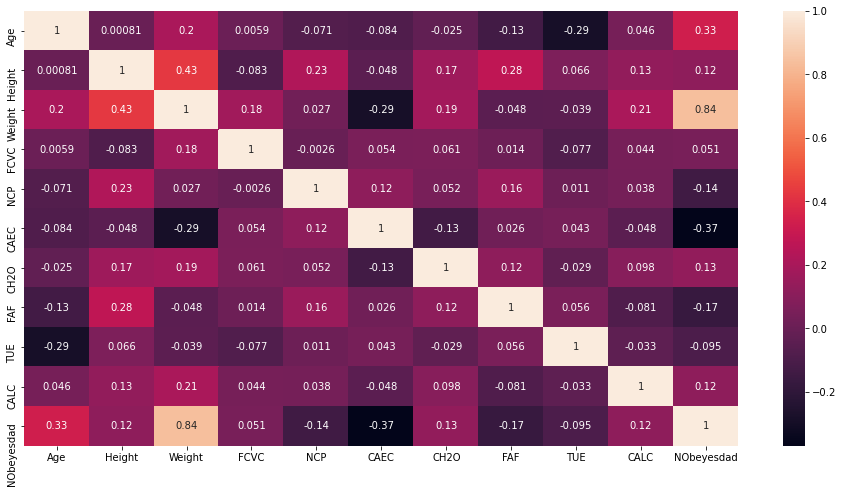

In [18]:
corrMatrix = numbers.corr()
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize = (16,8))
sn.heatmap(corrMatrix,annot=True)
plt.show()

In [18]:
obesity_encoded = obesity_numeric.copy()
obesity_encoded = pd.DataFrame(obesity_numeric, columns=['Age','Height','Weight','FCVC','NCP','CAEC','CH2O','FAF','TUE',
                                                        'CALC','Gender_Female','Gender_Male','family_history_with_overweight_no',
                                                        'family_history_with_overweight_yes','FAVC_no','FAVC_yes','SMOKE_no',
                                                        'SMOKE_yes','SCC_no','SCC_yes','MTRANS_Automobile','MTRANS_Bike',
                                                        'MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking',
                                                        'NObeyesdad'])

## BEGIN ML (consider feature scaling)

In [25]:
obesity_encoded.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   int64  
 4   NCP                                 2111 non-null   float64
 5   CAEC                                2111 non-null   int64  
 6   CH2O                                2111 non-null   int64  
 7   FAF                                 2111 non-null   int64  
 8   TUE                                 2111 non-null   int64  
 9   CALC                                2111 non-null   int64  
 10  Gender_Female                       2111 non-null   uint8  
 11  Gender_Male                         2111 no

In [19]:
# Assign X (data) and y (target)
X = obesity_encoded.iloc[:,0:25]
y = obesity_numeric["NObeyesdad"]
print(X.shape, y.shape)

(2111, 25) (2111,)


In [20]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Classification
## scale the three numeric variables using the standard scaler

In [26]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

# Scale_features = ['Age', 'Height', 'Weight']
# Scale_transformer = Pipeline(steps=[
#     ('Scaling', StandardScaler())
# ])

# Preprocessor = ColumnTransformer(transformers=[
#     ('Scale', Scale_transformer, Scale_features)
# ], remainder = 'passthrough')

# clf = Pipeline(steps=[('preprocessor', Preprocessor)])

In [21]:
from sklearn.preprocessing import StandardScaler

# X_train
X_train_scaled = X_train.copy()
col_names = ['Age','Height','Weight']
features_train = X_train_scaled[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
X_train_scaled[col_names] = features_train
X_train_scaled;

#X_test
X_test_scaled = X_test.copy()
features_test = X_test_scaled[col_names]
scaler = StandardScaler().fit(features_test.values)
features_test = scaler.transform(features_test.values)
X_test_scaled[col_names] = features_test
X_test_scaled;

## Logistic

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier

LogisticRegression(max_iter=10000)

In [30]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [31]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9336702463676564
Testing Data Score: 0.9185606060606061


In [32]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [3 3 3 3 3 3 3 3 3 3]
First 10 Actual labels: [0, 3, 0, 0, 1, 0, 3, 2, 3, 0]


In [34]:
target_names = ['0', '1', '2', '3']

from sklearn.metrics import classification_report
predictions = classifier.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90        68
           1       0.91      0.64      0.75        78
           2       0.87      0.93      0.90       134
           3       0.98      0.98      0.98       248

    accuracy                           0.92       528
   macro avg       0.90      0.88      0.88       528
weighted avg       0.92      0.92      0.92       528



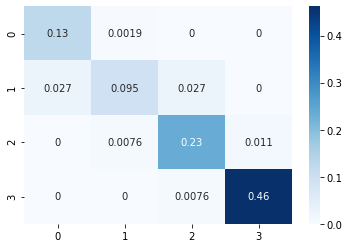

In [49]:
from sklearn import metrics
cfmatrix = metrics.confusion_matrix(y_true=y_test, y_pred=classifier.predict(X_test_scaled))
import seaborn as sns
sns.heatmap(cfmatrix/y_test.size, annot=True,fmt='.2g', cmap='Blues',)

## KNN

k: 1, Train/Test Score: 1.000/0.873
k: 3, Train/Test Score: 0.933/0.848
k: 5, Train/Test Score: 0.913/0.847
k: 7, Train/Test Score: 0.891/0.847
k: 9, Train/Test Score: 0.882/0.845
k: 11, Train/Test Score: 0.869/0.831
k: 13, Train/Test Score: 0.865/0.803
k: 15, Train/Test Score: 0.860/0.805
k: 17, Train/Test Score: 0.847/0.803
k: 19, Train/Test Score: 0.839/0.803


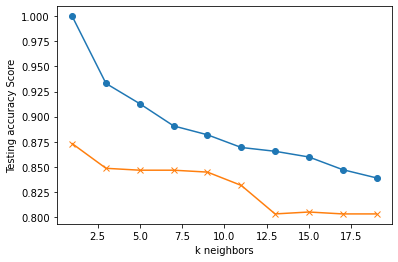

In [50]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [51]:
knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.831


In [53]:
target_names = ['0', '1', '2', '3']

from sklearn.metrics import classification_report
predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        68
           1       0.80      0.36      0.50        78
           2       0.73      0.82      0.77       134
           3       0.93      0.96      0.95       248

    accuracy                           0.83       528
   macro avg       0.80      0.77      0.76       528
weighted avg       0.83      0.83      0.82       528



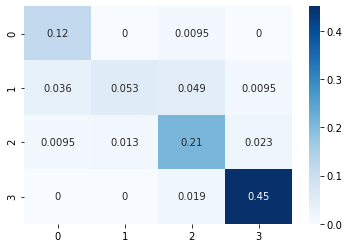

In [54]:
from sklearn import metrics
cfmatrix = metrics.confusion_matrix(y_true=y_test, y_pred=knn.predict(X_test_scaled))
import seaborn as sns
sns.heatmap(cfmatrix/y_test.size, annot=True,fmt='.2g', cmap='Blues',)

# Regression: attempt to predict weight

In [95]:
# Assign X (data) and y (target)
X2 = obesity_numeric[['Age','Height','FCVC','NCP','CAEC','CH2O','FAF','TUE',
                      'CALC','Gender_Female','Gender_Male','family_history_with_overweight_no',
                      'family_history_with_overweight_yes','FAVC_no','FAVC_yes','SMOKE_no',
                      'SMOKE_yes','SCC_no','SCC_yes','MTRANS_Automobile','MTRANS_Bike',
                      'MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking']]
y2 = obesity_numeric["Weight"].values.reshape(-1, 1)
print(X2.shape, y2.shape)

(2111, 24) (2111, 1)


In [96]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=31)

In [117]:
# scale age, height, weight using the standard scaler

from sklearn.preprocessing import StandardScaler
# X_train
X2_train_scaled = X2_train.copy()
col_names = ['Age','Height']
features_train = X2_train_scaled[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
X2_train_scaled[col_names] = features_train
X2_train_scaled;

#X_test
X2_test_scaled = X2_test.copy()
features_test = X2_test_scaled[col_names]
scaler = StandardScaler().fit(features_test.values)
features_test = scaler.transform(features_test.values)
X2_test_scaled[col_names] = features_test
X2_test_scaled;

y2_scaler = StandardScaler().fit(y2_train)
y2_train_scaled = y2_scaler.transform(y2_train)
y2_test_scaled = y2_scaler.transform(y2_test)

In [124]:
print(X2_train_scaled.shape)
print(y2_train_scaled.shape)

(1583, 24)
(1583, 1)


In [112]:
from sklearn.metrics import mean_squared_error

MSE: 0.4609497490349682, R2: 0.5280154892354021


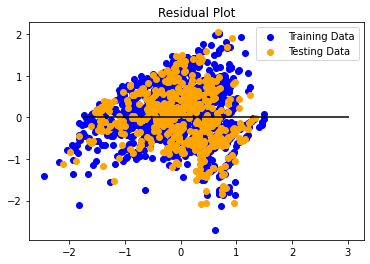

In [135]:
# LASSO model
# Note: Use an alpha of .01 
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X2_train_scaled, y2_train_scaled)

predictions = lasso.predict(X2_test_scaled)

MSE = mean_squared_error(y2_test_scaled, predictions)
r2 = lasso.score(X2_test_scaled, y2_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

plt.scatter(lasso.predict(X2_train_scaled), lasso.predict(X2_train_scaled) - y2_train_scaled[:,0], c="blue", label="Training Data")
plt.scatter(lasso.predict(X2_test_scaled), lasso.predict(X2_test_scaled) - y2_test_scaled[:,0], c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y2_test_scaled.min(), xmax=y2_test_scaled.max())
plt.title("Residual Plot")
plt.show()



MSE: 0.44911288064103416, R2: 0.5401357226222134


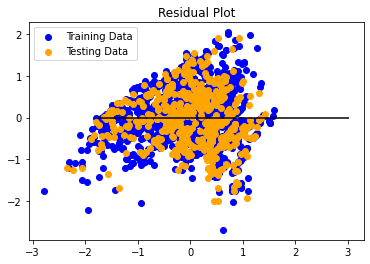

In [139]:
# Ridge model
# Note: Use an alpha of .01 
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X2_train_scaled, y2_train_scaled)

predictions = ridge.predict(X2_test_scaled)

MSE = mean_squared_error(y2_test_scaled, predictions)
r2 = ridge.score(X2_test_scaled, y2_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

plt.scatter(ridge.predict(X2_train_scaled), ridge.predict(X2_train_scaled) - y2_train_scaled, c="blue", label="Training Data")
plt.scatter(ridge.predict(X2_test_scaled), ridge.predict(X2_test_scaled) - y2_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y2_test_scaled.min(), xmax=y2_test_scaled.max())
plt.title("Residual Plot")
plt.show()


# Clustering: using height and weight

In [160]:
X = obesity_numeric[['Age','Weight']].to_numpy()
X

array([[ 21. ,  64. ],
       [ 21. ,  56. ],
       [ 23. ,  77. ],
       ...,
       [ 23. , 133.7],
       [ 24. , 133.3],
       [ 24. , 133.5]])

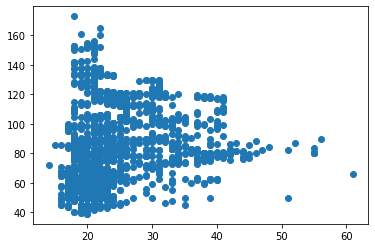

In [161]:
# Plot and show scatter
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [162]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)

# Fit the model to the data
kmeans.fit(X)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)

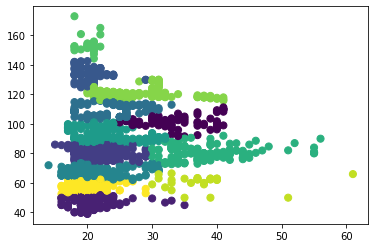

In [163]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [164]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [165]:
centers

array([[ 32.32323232, 101.66969697],
       [ 19.99166667,  47.33      ],
       [ 21.64285714,  80.65714286],
       [ 20.84955752, 133.30442478],
       [ 24.90522876, 109.10098039],
       [ 21.36206897,  67.89913793],
       [ 23.21925134,  92.85454545],
       [ 38.025     ,  80.27375   ],
       [ 20.07692308, 153.77307692],
       [ 27.68586387, 120.61099476],
       [ 37.62068966,  60.62758621],
       [ 19.796875  ,  57.584375  ]])

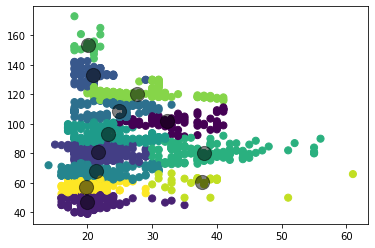

In [166]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()